# Exercice de Machine Learning sur la prévision des prix des maisons de Boston

Cet exercice consiste à se baser sur des caractéristiques des maisons de Boston pour pouvoir prédire leur prix

La liste de toutes les données à utiliser qui renseignent toutes les informations sur les maison sont déjà intégrés au module sklearn de python

In [30]:
#importation des modules nécessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#Nous allons donc importer nos donées en utilisant la fonction load_boston de sklearn

In [3]:
from sklearn.datasets import load_boston

Nous allons maintenant charger les données et voir leur différentes caractéristiques

In [4]:
boston_dataset = load_boston()

On essaye d'afficher les données qui sont dans notre variable boston_dataset

In [51]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
#Nottre variable est en effet un dictionnaire contenant les données, essayons de voir les différentes clés de notre dictionnaire
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Essayons d'accéder à chaque clés pour voir ce qu'ils nous donnent comme information

**Dans data, nous avons plusieurs données renseignant sur les caractéristiques de plusieurs maisons à Boston qu'on utilisera pour notre analyse. Ces données sont stockées dans un tableau numpy**


In [7]:
boston_dataset["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

**target renseigne sur les prix des maisons dont on a les données plus haut. C'est ce prix qu'on essayera de prédire pour des maisons juste en connaissant les caractéristiques**


In [8]:
#Ils sont aussi stocké sous forme de tableau numpy
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
#feature_names contient un liste de tous nos caractéristiques dont on a les valeurs sur les maisons de Boston
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
#DESCR renseigne juste sur une description du dataset, ce que signifie chaque colonne...
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
#filename renseigne sur le chemin et le nom du fichier en local
boston_dataset.filename

'/home/romerik/.local/lib/python3.9/site-packages/sklearn/datasets/data/boston_house_prices.csv'

**Pour des manipulations plus faciles par la suite, nous créons un DataFrame pandas à partir des numpy ndarrays stockés dans boston_dataset.data comme suit :**

In [13]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [14]:
#on affiche les première lignes de notre dataframe
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
#Nous voyons que nous avons 506 lignes et 13 colonnes ou caractéristiques. On peut voir ça aussi de la façon suivante
boston.shape

(506, 13)

**Nous allons à présent ajouter la colonne target à notre dataframe pour voir par ligne le prix et caractéristiques de chaque maison, nommons la price**

In [17]:
boston['PRICE'] = boston_dataset.target

In [18]:
#on réaffiche notre dataframe et on doit y voir la colonne price qui s'ajoute
boston 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
#On peut avoir quelques informations sur nos colonnes en faisant:
boston.info()
#on voit que tout nos champs sont des nombre (float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
#On peut récueillir quelques statistiques sur les informations contenues dans nos colonnes(maximum, moyenne, variance...)
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CHAS'}>]], dtype=object)

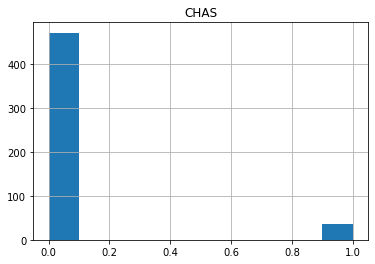

In [21]:
#Visualisation histogramme de quelques unes de nos colonnes
boston.hist(column="CHAS")

Ce graphe montre que les valeurs de la colonne CHAS ne sont que des 0 et des 1, avec en majorité les 0. En effet cette nous dit si la maison en question délimite une rivière, 0 si non, 1 si oui

array([[<AxesSubplot:title={'center':'RM'}>]], dtype=object)

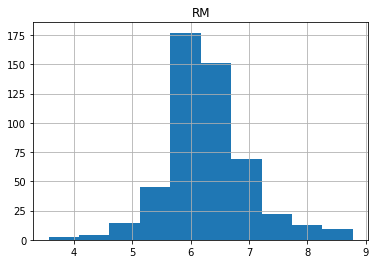

In [22]:
boston.hist(column="RM")

On constate que la distribution de RM est symétrique

Une distribution est dite symétrique si les valeurs observées se répartissent de façon uniforme autour des trois valeurs centrales : la moyenne, le mode et la médiane.

**Pour comprendre plus la relation entre nos colonnes nous allons utiliser une matrice de correlation. Cette relation est symétrique où chaque élément est un coefficient de corrélation allant de -1 à 1. Une valeur proche de 1 (resp. -1) indique une forte corrélation positive (resp. négative) entre les variables.**

In [24]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


La dernière ligne nous montre la correlation entre nos variables d'entrée et la variable que l'on doit prévoir

On constate que la colonne LSTAT a une correlation négative forte avec la variable PRICE. Cela veut dire que plus la valeur de la variable LSTAT augmente, plus notre PRICE diminue

Pour la colonne RM c'est le contraire. Il y a une forte correlation positive entre les deux variables, donc les valeurs des deux croissent en même temps

**Montrons cela à partir d'un graphe pour les colonnes LSTATet RM avec PRICE**

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

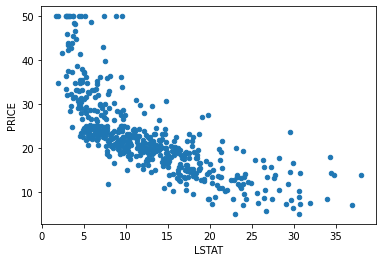

In [25]:
boston.plot(kind="scatter", x="LSTAT", y="PRICE")

On voit que plus LSTAT augmente, plus PRICE diminue

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

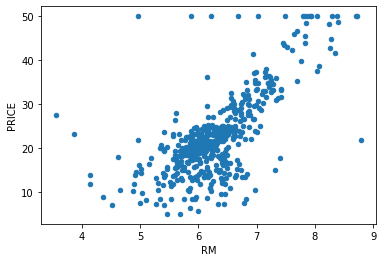

In [26]:
boston.plot(kind="scatter", x="RM", y="PRICE")

On voit que plus RM augmente, plus aussi PRICE augmente

**Puisque ces deux variables sont les plus en relation avec notre variable PRICE, nous allons les utiliser donc dans notre model pour pouvoir faire notre prédiction**

In [27]:
#Préparation des données
X = boston[['LSTAT', 'RM']]
Y = boston['PRICE']

In [29]:
#Pour le model, nous allons utiliser la regression Linéaire qui est un algorithme déjà implémenté dans sklearn
model = LinearRegression()

Ici puisque toutes nos données sont ensemble (dans la variable boston) on va les découper en deux ensembles... une partie pour entrainer notre model et l'autre pour le tester. On va garder 70% pour l'entrainement et 30% pour les tests

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [35]:
X_train

,LSTAT,RM
13,8.26,5.949
61,14.44,5.966
377,21.24,6.794
39,4.32,6.595
365,7.12,3.561
...,...,...
255,9.25,5.876
72,5.52,6.065
396,19.37,6.405
235,10.88,6.086


In [36]:
X_test

,LSTAT,RM
307,7.53,6.849
343,7.18,6.696
47,18.80,6.030
67,8.10,5.878
362,10.19,5.362
...,...,...
467,21.32,6.003
95,6.65,6.625
122,17.93,5.961
260,9.59,7.203


In [37]:
 Y_train

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: PRICE, Length: 354, dtype: float64

In [38]:
Y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
467    19.1
95     28.4
122    20.5
260    33.8
23     14.5
Name: PRICE, Length: 152, dtype: float64

In [39]:
#Entrainement du model
model.fit(X_train, Y_train)

LinearRegression()

Notre modèle doit trouver les meilleurs coefficient pour la droite qui doit passer le plus efficacement possible entre tous les point pour pouvoir les utiliser pour prédire dans le futur

Ici on a deux paramètres donc l'équation de notre droite sera :

PRICE = a * LSTAT + b * RM  + c

Après l'entrainement de notre modèle, on peut avoir ces differents coefficients

In [40]:
#les coefficients (a,b) trouvé par notre modèle sont :
model.coef_

array([-0.67762654,  4.12674118])

In [41]:
#la constante c est : 
model.intercept_

5.316818471096003

Maintenant, on peut faire une prédiction à partir de nos données de test

In [42]:
y_test_predicted = model.predict(X_test)

In [46]:
y_test_predicted.round(2)

array([28.48, 28.08, 17.46, 24.09, 20.54, 24.08, 29.49, 21.54, 17.73,
       25.83, 27.93, 30.56, 19.74, 22.26, 22.23, 20.24, 17.01, 38.19,
       25.71,  5.63, 21.07, 17.26, 26.13, 27.64, 28.11, 13.12, 16.69,
       23.  , 31.43, 13.43, 28.75, 15.94, 36.52, 19.97, 24.51, 20.56,
       19.43, 31.2 ,  6.58, 20.4 , 26.48, 26.78, 27.48, 14.41, 18.62,
       18.07, 36.21, 18.53, 23.85, 24.55, 26.22, 23.95, 28.32, 23.87,
        6.22, 27.4 ,  9.16, 26.53, 20.1 , 36.67, 21.6 , 28.25, 15.53,
       19.56,  7.63, 30.71, 38.05, 26.44, 23.07, 21.59, 27.2 ,  5.35,
       16.31, 24.74, 21.05, 22.03, 32.26, 26.37, 27.17, 32.4 , 21.43,
       23.18, 31.32, 16.9 , 28.05, 28.13, 18.71, 28.41, 19.67, 19.97,
       30.28, 37.77, 17.76, 21.7 , 21.07, 21.12, 25.97, 26.37, 36.62,
       22.07, 18.77, 19.31, 26.84, 26.03,  6.22, 22.67, 16.65, 27.38,
       21.8 , 28.1 , 34.  , 25.67, 16.29, 31.55, 30.3 , 32.99, 23.42,
       19.91, 32.96, 34.51, 22.78, 20.4 , 29.98, 21.5 , 25.96, 21.4 ,
       24.79, 24.42,

In [47]:
#Et voici les résultats attendu
np.array(Y_test)

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1,
       25. ,  9.7, 23.9, 36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5,
       23.7, 28.5, 24.3, 23.8, 19.1, 28.4, 20.5, 33

Quelle est la qualité de notre prédiction ? Nous pouvons examiner les performances du modèle en voyant le pourcentage des données bien prédites


In [50]:
model.score(X_test,Y_test)

0.6843090583339468

Cela nous montre que notre modèle a donc bien prédit **68%** des données de test

# Fin du notebook